In [2]:
import numpy as np
import matplotlib
import pandas as pd
from sklearn.model_selection import train_test_split


dataset = pd.read_csv('/Users/wzhang/Documents/injury data cleaned copy.csv')

X = pd.DataFrame(dataset.iloc[:,1:19].values)
Y = pd.DataFrame(dataset.iloc[:,19:].values)
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 1)
X, Y = sm.fit_resample(X, Y)
print(X)
print(Y)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
print(X_train.shape)
print(Y_train.shape)

       0   1   2   3   4   5    6   7   8   9   10  11  12  13  14  15  16  17
0       1   1   5   1  16   0  106   1   2  13   3  20   0   0   0   0   2   5
1       1  10  12  10  15   2  104   2   2  13   3   8   0   1   0   0   1   5
2       2   1   9  24  21   6  103   2   2  13   3   8   0   0   0   0   1   3
3       1   1  12   9   8   2  102   1   1  11   3   8   0   0   0   0   2   3
4       2   1   6   3  13   1  101   1   2  13   3   8   0   0   0   0   2   4
...    ..  ..  ..  ..  ..  ..  ...  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..
19183   2   1  10  24   6   7   68   2   1  11   3   6   0   0   0   0   1   3
19184   1   1   8  18  17   6   65   1   1  11   6   8   0   0   0   0   1   3
19185   2  10   8   6  14   2   62   1   1  11   2   7   0   0   0   0   1   3
19186   2   1   8  21   9   1   79   1   1  11   3   8   0   0   0   0   1   2
19187   1   1   8  24  14   1   75   1   1  13  20  20   0   1   0   0   1   4

[19188 rows x 18 columns]
       0
0      2
1      

In [3]:
features = pd.DataFrame(dataset.iloc[:,1:19])
features = features.columns
print(features)

Index(['LGT_COND', 'WEATHER', 'MONTH', 'DAY', 'HOUR', 'MAN_COLL', 'AGE', 'SEX',
       'PER_TYP', 'SEAT_POS', 'REST_USE', 'AIR_BAG', 'EJECTION', 'EXTRICAT',
       'DRINKING', 'DRUGS', 'RUR_URB', 'FUNC_SYS'],
      dtype='object')


In [4]:
from keras.models import Sequential, Model
from tensorflow.keras.layers import LSTM, Dropout, Dense, BatchNormalization, GRU, LayerNormalization, MultiHeadAttention,TimeDistributed, Input, Flatten
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier 
from sklearn.svm import SVC

2024-07-17 10:53:49.074844: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [5]:
svm_model = SVC(kernel='rbf', C=10, gamma='scale',probability=True)
svm_model.fit(X_train, Y_train)


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=10, probability=True)

In [6]:
res = svm_model.predict(X_test)
print(res)
print(Y_test)

[0 0 2 ... 0 0 0]
       0
5845   0
12346  0
1402   2
5628   2
12976  0
...   ..
4593   2
6845   1
14669  1
8968   0
10829  0

[3838 rows x 1 columns]


In [7]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Y_test,res)
print(accuracy)
from sklearn.metrics import classification_report
print(classification_report(Y_test,res,digits=6))

0.7451797811360084
              precision    recall  f1-score   support

           0   0.733150  0.842688  0.784112      1265
           1   0.676834  0.635449  0.655489      1292
           2   0.830914  0.759563  0.793638      1281

    accuracy                       0.745180      3838
   macro avg   0.746966  0.745900  0.744413      3838
weighted avg   0.746823  0.745180  0.743993      3838



[0 0 2 ... 0 0 0]
       0
5845   0
12346  0
1402   2
5628   2
12976  0
...   ..
4593   2
6845   1
14669  1
8968   0
10829  0

[3838 rows x 1 columns]


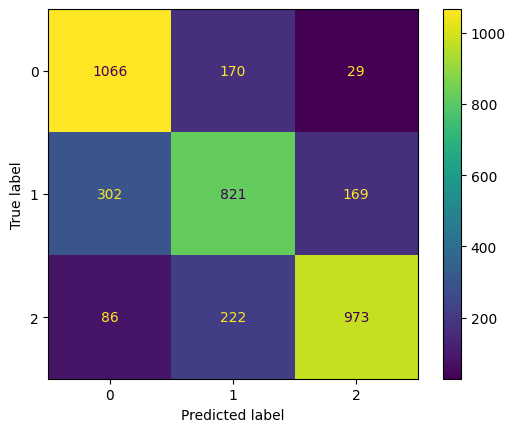

In [8]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

res = np.array(res)
print(res)
print(Y_test)
cm = confusion_matrix(Y_test, res)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [9]:
svm_model.predict_proba(X_test)

array([[0.59305093, 0.32499467, 0.0819544 ],
       [0.74025305, 0.24264778, 0.01709918],
       [0.01030667, 0.11170713, 0.87798619],
       ...,
       [0.65887401, 0.30094362, 0.04018238],
       [0.73248918, 0.16742126, 0.10008956],
       [0.74983116, 0.18451932, 0.06564952]])

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


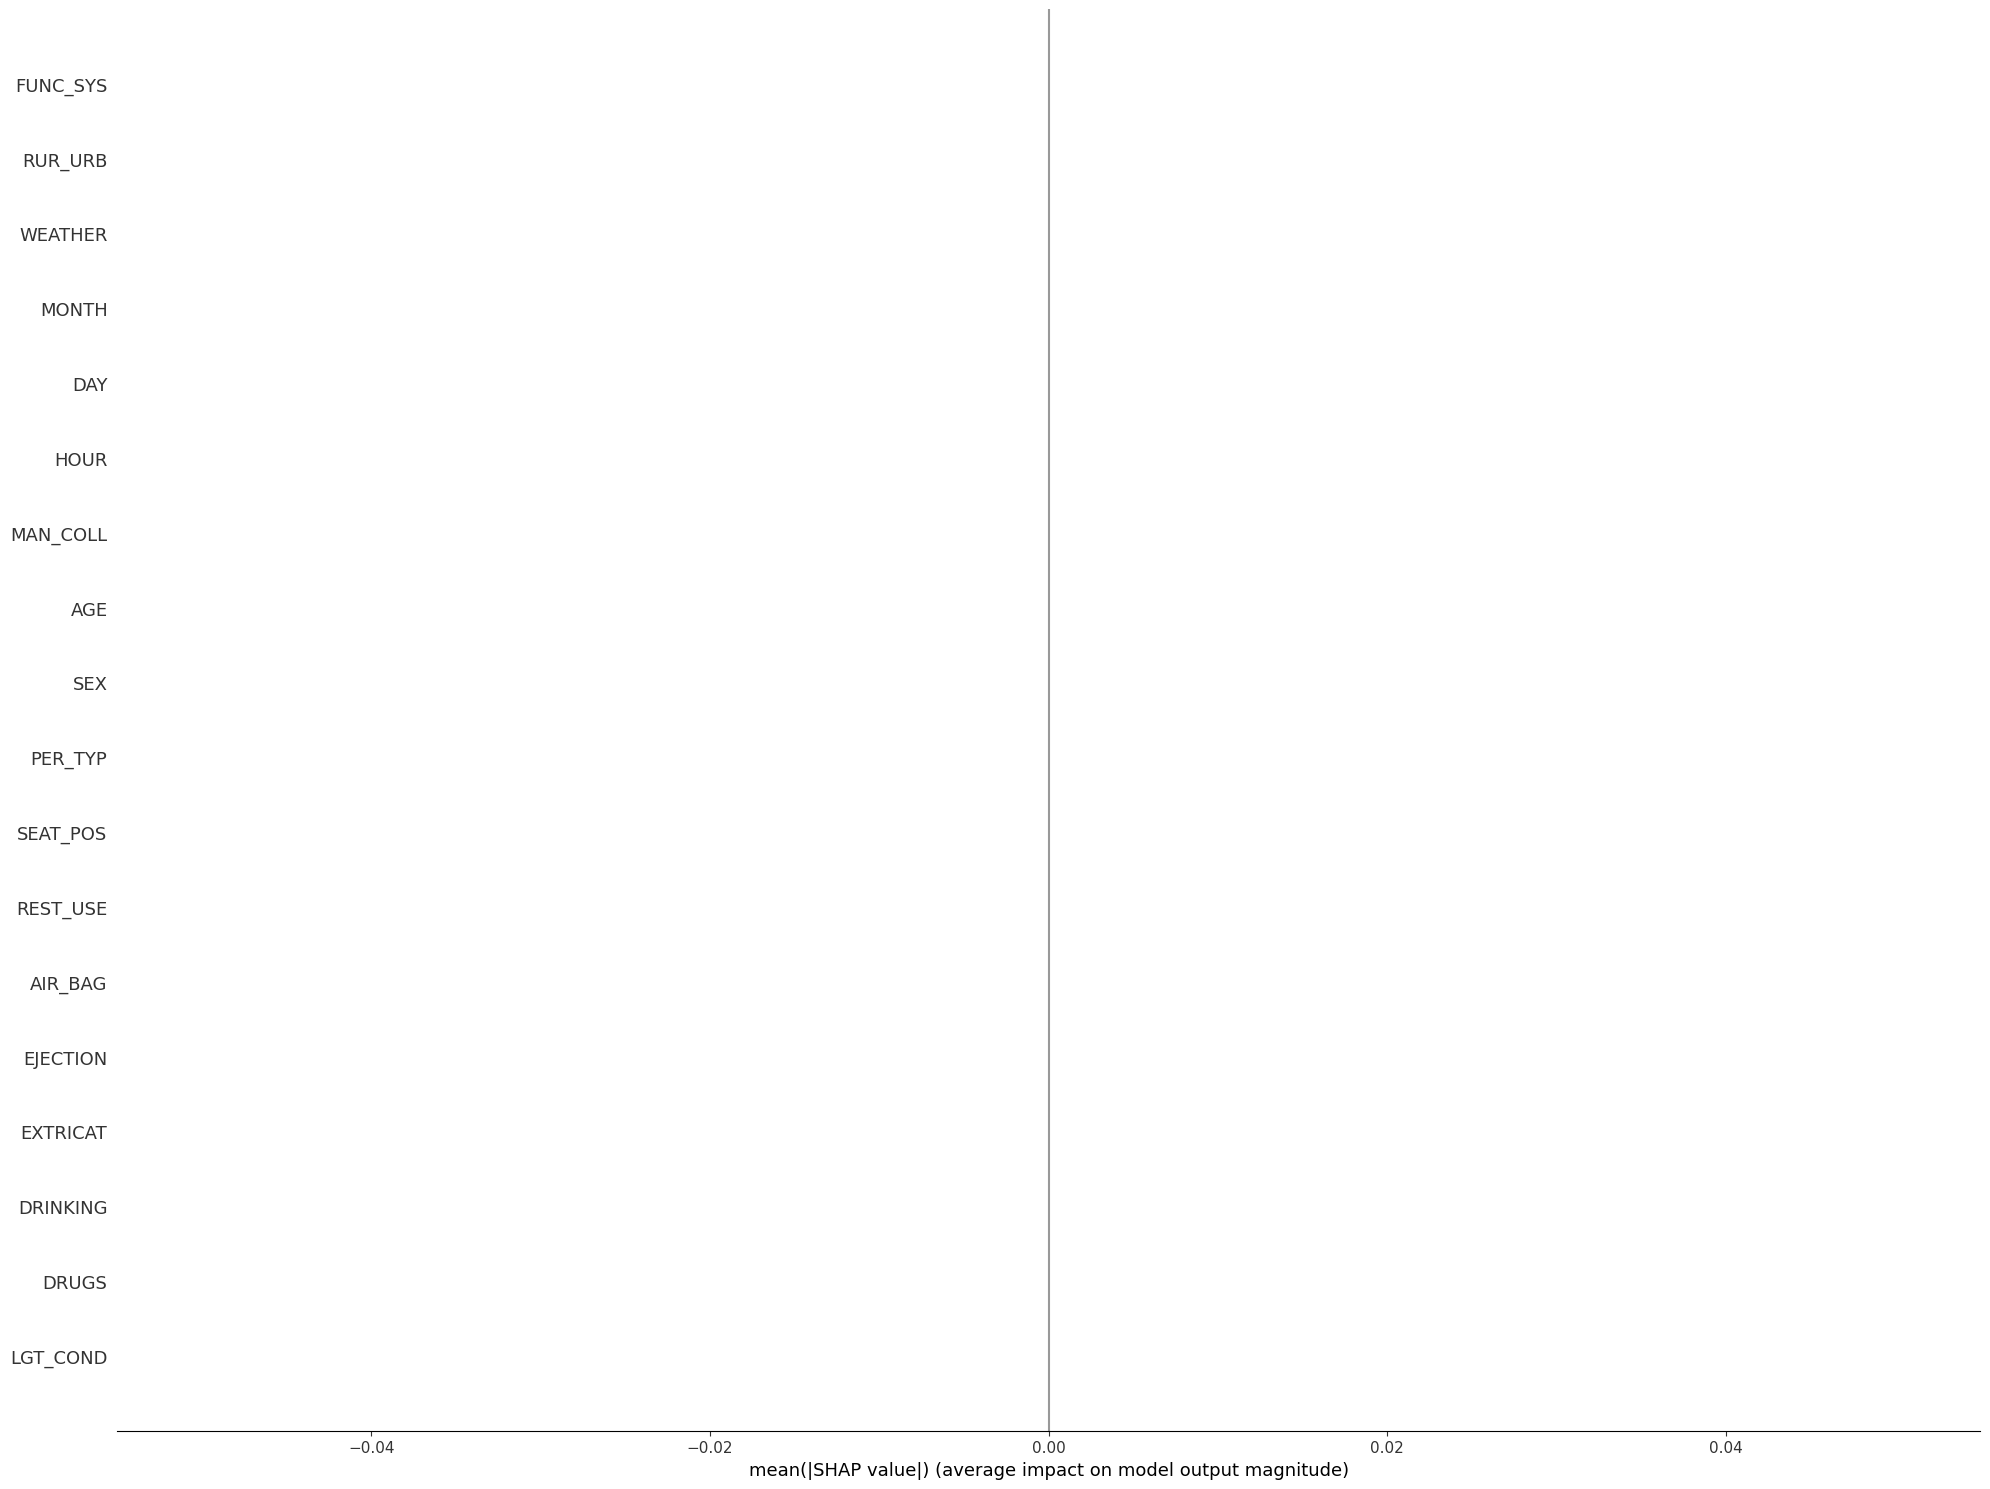

In [10]:
import shap
X_test_shap = shap.sample(X_test,nsamples = 2)
explainer = shap.Explainer(svm_model.predict, X_test_shap)
shap_values = explainer(X_test_shap)
shap.summary_plot(shap_values,X_test_shap,feature_names = features,plot_type="bar", plot_size=(20,15),show=False)